## Task 2 - Model Building and Training

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import mlflow
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Add the parent directory to the system path 
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

In [3]:
from scripts.model_utils import *

In [4]:
# Load fraud data
fraud_data = pd.read_csv('../data/processed/processed_fraud_data.csv')
# Load credit card data
credit_data = pd.read_csv('../data/processed/processed_credit_card.csv')

In [5]:
fraud_data.head()

,user_id,purchase_value,device_id,age,ip_address,class,ip_int,hour_of_day,day_of_week,month,...,country_Zambia,country_Zimbabwe,signup_hour,signup_day,signup_year,signup_month,purchase_hour,purchase_day,purchase_year,purchase_month
0,247547,0.549607,KIXYSVCHIPQBR,-0.363124,-1.728724,0,-1.728724,-1.231124,1.487911,0.749993,...,False,False,22,1,2015,2,2,5,2015,4
1,220737,-1.197335,PKYOWQKWGJNJI,0.101168,-1.728666,0,-1.728666,1.229002,-0.505034,-1.500438,...,False,False,20,6,2015,6,1,0,2015,6
2,390400,0.385831,LVCSXLISZHVUO,-0.479197,-1.728664,0,-1.728664,1.663142,0.989675,-0.750295,...,False,False,18,3,2015,1,18,3,2015,1
3,69592,0.986342,UHAUHNXXUADJE,-0.363124,-1.728577,0,-1.728577,0.650149,0.989675,-0.375223,...,False,False,21,1,2015,4,13,0,2015,5
4,174987,0.767974,XPGPMOHIDRMGE,0.449387,-1.728546,0,-1.728546,-1.086411,-1.003270,1.875208,...,False,False,7,1,2015,7,18,2,2015,9


In [6]:
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996823,-0.701082,-0.041687,1.680101,0.976623,-0.247020,0.348012,0.193700,0.084434,0.333534,...,-0.024777,0.383483,-0.177444,0.110157,0.247059,-0.392622,0.333033,-0.065850,0.244200,0
1,-1.996823,0.608792,0.164138,0.109279,0.318998,0.042258,-0.060980,-0.065656,0.072903,-0.231703,...,-0.311372,-0.881454,0.162081,-0.561503,0.321175,0.260854,-0.027154,0.043219,-0.342584,0
2,-1.996802,-0.700336,-0.811337,1.174270,0.270648,-0.366756,1.352655,0.643223,0.210788,-1.381169,...,0.343094,1.065068,1.457772,-1.138484,-0.628161,-0.288861,-0.144325,-0.183824,1.158900,0
3,-1.996802,-0.499064,-0.109972,1.187383,-0.608355,-0.008814,0.937245,0.192079,0.320843,-1.264664,...,-0.149093,0.007299,-0.305465,-1.941446,1.242487,-0.460694,0.154039,0.185687,0.139886,0
4,-1.996781,-0.597606,0.535539,1.025470,0.287092,-0.297036,0.072873,0.481517,-0.228725,0.747917,...,-0.012516,1.101780,-0.220709,0.232904,-0.394800,1.041677,0.550001,0.654234,-0.073813,0


In [7]:
print(fraud_data.isnull().sum())

user_id           0
purchase_value    0
device_id         0
age               0
ip_address        0
                 ..
signup_month      0
purchase_hour     0
purchase_day      0
purchase_year     0
purchase_month    0
Length: 212, dtype: int64


In [8]:
fraud_data.dtypes

user_id             int64
purchase_value    float64
device_id          object
age               float64
ip_address        float64
                   ...   
signup_month        int64
purchase_hour       int64
purchase_day        int64
purchase_year       int64
purchase_month      int64
Length: 212, dtype: object

In [9]:
fraud_data.columns

Index(['user_id', 'purchase_value', 'device_id', 'age', 'ip_address', 'class',
       'ip_int', 'hour_of_day', 'day_of_week', 'month',
       ...
       'country_Zambia', 'country_Zimbabwe', 'signup_hour', 'signup_day',
       'signup_year', 'signup_month', 'purchase_hour', 'purchase_day',
       'purchase_year', 'purchase_month'],
      dtype='object', length=212)

In [9]:
# 2. Initialize MLflow experiment
mlflow.set_experiment("fraud_detection_comparison")

<Experiment: artifact_location='file:///d:/KIFYA%20AIM/WEEK%208%20AND%209/project/fraud-detection-system/notebooks/mlruns/743817608207788903', creation_time=1729453842785, experiment_id='743817608207788903', last_update_time=1729453842785, lifecycle_stage='active', name='fraud_detection_comparison', tags={}>

In [10]:
# 3. Initialize the modeling class for both datasets
fraud_detector_ecommerce = FraudDetectionModeling(experiment_name="ecommerce_fraud_detection")
fraud_detector_credit = FraudDetectionModeling(experiment_name="credit_fraud_detection")

In [ ]:
# # Using pandas get_dummies for one-hot encoding the 'age' column
# X_fraud_encoded = pd.get_dummies(X_fraud, columns=['age'])

In [11]:
# Encode Categorical Features
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['device_id','age_group']
le = LabelEncoder()
for col in categorical_columns:
    fraud_data[col] = le.fit_transform(fraud_data[col])

In [12]:
# Prepare features and target for both datasets
# For Fraud Data
X_fraud = fraud_data.drop(['class'], axis=1)
y_fraud = fraud_data['class']

In [13]:
print(X_fraud.dtypes)

user_id             int64
purchase_value    float64
device_id           int32
age               float64
ip_address        float64
                   ...   
signup_month        int64
purchase_hour       int64
purchase_day        int64
purchase_year       int64
purchase_month      int64
Length: 211, dtype: object


In [14]:
X_train_fraud_scaled, X_test_fraud_scaled, y_train_fraud, y_test_fraud = \
    fraud_detector_ecommerce.prepare_data(X_fraud, y_fraud, test_size=0.2, sampling_strategy='balanced')

In [15]:
print("\nPreparing Credit Card Fraud Data...")
X_credit = credit_data.drop(['Class'], axis=1)
y_credit = credit_data['Class']


Preparing Credit Card Fraud Data...


In [16]:
X_train_credit_scaled, X_test_credit_scaled, y_train_credit, y_test_credit = \
    fraud_detector_credit.prepare_data(X_credit, y_credit, test_size=0.2, sampling_strategy='balanced')

In [17]:
# 5. Initialize models for both datasets
print("\nInitializing models...")
# E-commerce fraud models
fraud_detector_ecommerce.initialize_traditional_models()
fraud_detector_ecommerce.initialize_deep_models(input_shape=(X_train_fraud_scaled.shape[1], 1))


Initializing models...


In [18]:
# Credit card fraud models
fraud_detector_credit.initialize_traditional_models()
fraud_detector_credit.initialize_deep_models(input_shape=(X_train_credit_scaled.shape[1], 1))

In [19]:
# 6. Train and evaluate traditional models
print("\nTraining traditional models...")

# Traditional models for E-commerce fraud
traditional_models = ['logistic_regression', 'decision_tree', 'random_forest', 
                     'gradient_boosting', 'mlp']

print("\nTraining E-commerce Fraud Detection Models:")
for model_name in traditional_models:
    print(f"\nTraining {model_name}...")
    fraud_detector_ecommerce.train_traditional_model(model_name)


Training traditional models...

Training E-commerce Fraud Detection Models:

Training logistic_regression...


2024/10/22 11:21:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Training decision_tree...


2024/10/22 11:21:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Training random_forest...


2024/10/22 11:23:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Training gradient_boosting...


2024/10/22 11:28:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Training mlp...


2024/10/22 11:33:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [ ]:
print("\nTraining Credit Card Fraud Detection Models:")
for model_name in traditional_models:
    print(f"\nTraining {model_name}...")
    fraud_detector_credit.train_traditional_model(model_name)


Training Credit Card Fraud Detection Models:

Training logistic_regression...


2024/10/22 13:23:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Training decision_tree...


2024/10/22 13:24:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Training random_forest...


2024/10/22 13:34:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Training gradient_boosting...


In [ ]:
# 7. Train and evaluate deep learning models
print("\nTraining deep learning models...")

# Deep learning models for E-commerce fraud
deep_models = ['cnn', 'rnn', 'lstm']

print("\nTraining E-commerce Fraud Deep Learning Models:")
for model_name in deep_models:
    print(f"\nTraining {model_name}...")
    fraud_detector_ecommerce.train_deep_model(model_name, epochs=50, batch_size=32)

print("\nTraining Credit Card Fraud Deep Learning Models:")
for model_name in deep_models:
    print(f"\nTraining {model_name}...")
    fraud_detector_credit.train_deep_model(model_name, epochs=50, batch_size=32)


Training deep learning models...

Training E-commerce Fraud Deep Learning Models:

Training cnn...
Epoch 1/50
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.7955 - loss: 0.4295 - val_accuracy: 0.9447 - val_loss: 0.2597
Epoch 2/50
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.8676 - loss: 0.3154 - val_accuracy: 0.9136 - val_loss: 0.3164
Epoch 3/50
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.8808 - loss: 0.2919 - val_accuracy: 0.9462 - val_loss: 0.2465
Epoch 4/50
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.8905 - loss: 0.2722 - val_accuracy: 0.9482 - val_loss: 0.2313
Epoch 5/50
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.8986 - loss: 0.2547 - val_accuracy: 0.9247 - val_loss: 0.2947
Epoch 6/50
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9028 - loss: 0.2451 - val_accuracy: 0.9510 - val_loss: 0.2164
Epoch 7/50
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9071 - loss: 0.2345 - val_accuracy: 0.9372 - 

2024/10/21 19:39:45 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/21 19:39:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Training rnn...
Epoch 1/50
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 569s 95ms/step - accuracy: 0.5127 - loss: 0.6946 - val_accuracy: 0.7090 - val_loss: 0.6900
Epoch 2/50
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 487s 83ms/step - accuracy: 0.5124 - loss: 0.6931 - val_accuracy: 0.8217 - val_loss: 0.6859
Epoch 3/50
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 580s 99ms/step - accuracy: 0.5112 - loss: 0.6931 - val_accuracy: 0.6783 - val_loss: 0.6943
Epoch 4/50
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 291s 50ms/step - accuracy: 0.5086 - loss: 0.6932 - val_accuracy: 0.4763 - val_loss: 0.6977
Epoch 5/50
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 305s 52ms/step - accuracy: 0.5057 - loss: 0.6935 - val_accuracy: 0.4131 - val_loss: 0.6922
Epoch 6/50
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 378s 65ms/step - accuracy: 0.5070 - loss: 0.6933 - val_accuracy: 0.3645 - val_loss: 0.7049
Epoch 7/50
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 366s 63ms/step - accuracy: 0.5089 - loss: 0.6931 - val_accuracy: 0.3450 - val_loss: 0.7164
Epoch 8/50
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 256s 44ms/

### Plot results and compare models


Plotting results...

E-commerce Fraud Detection Results:


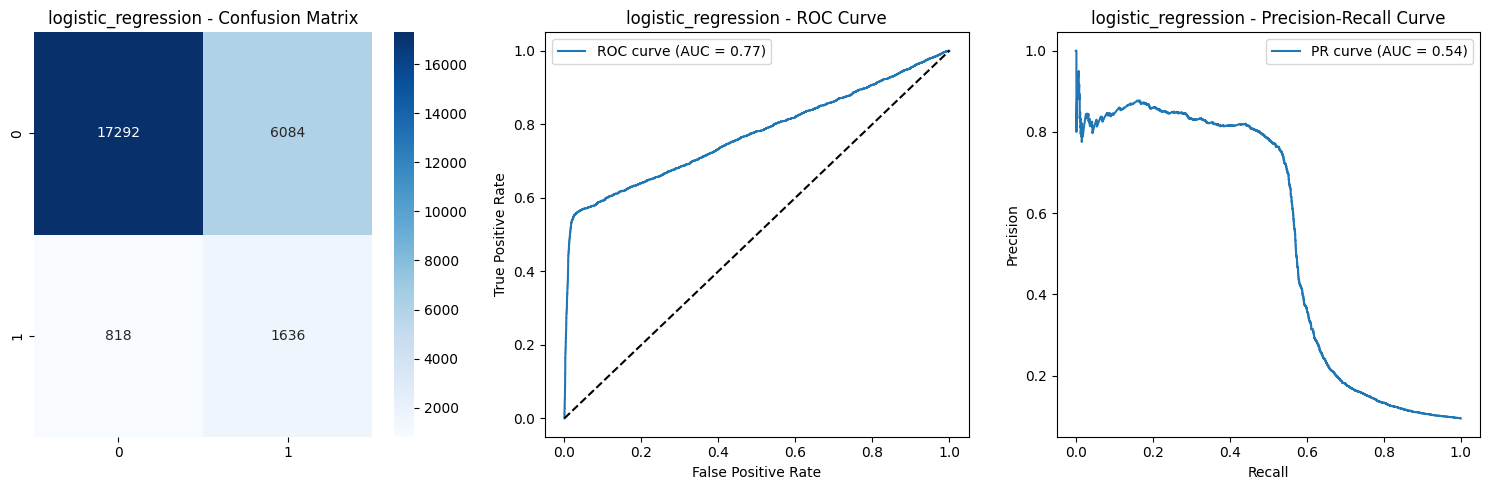

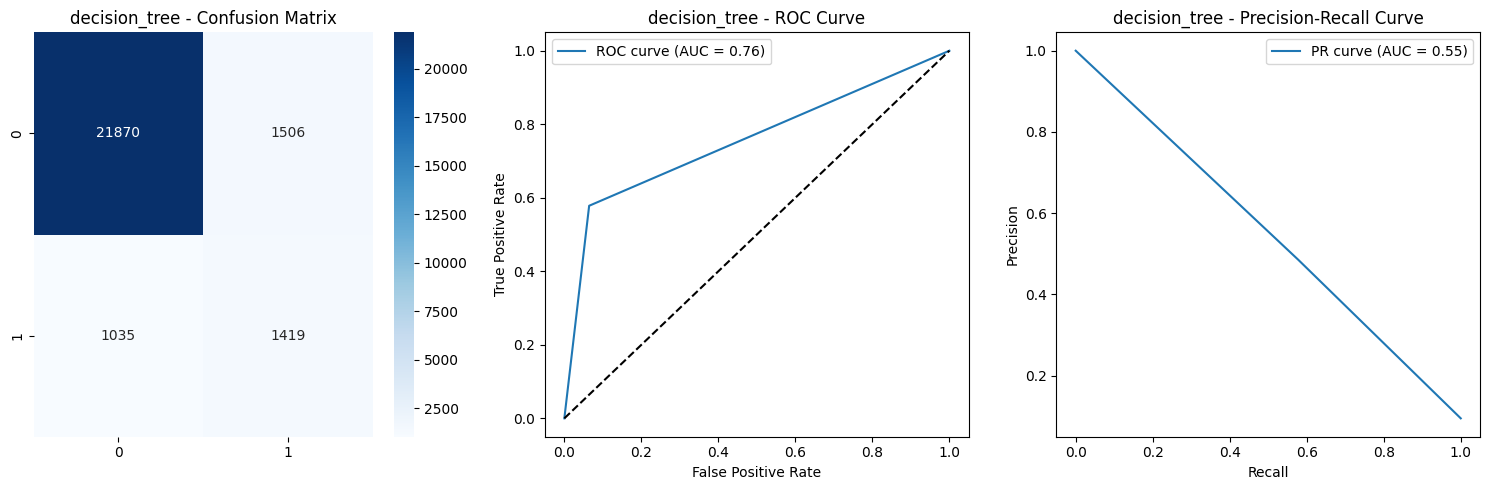

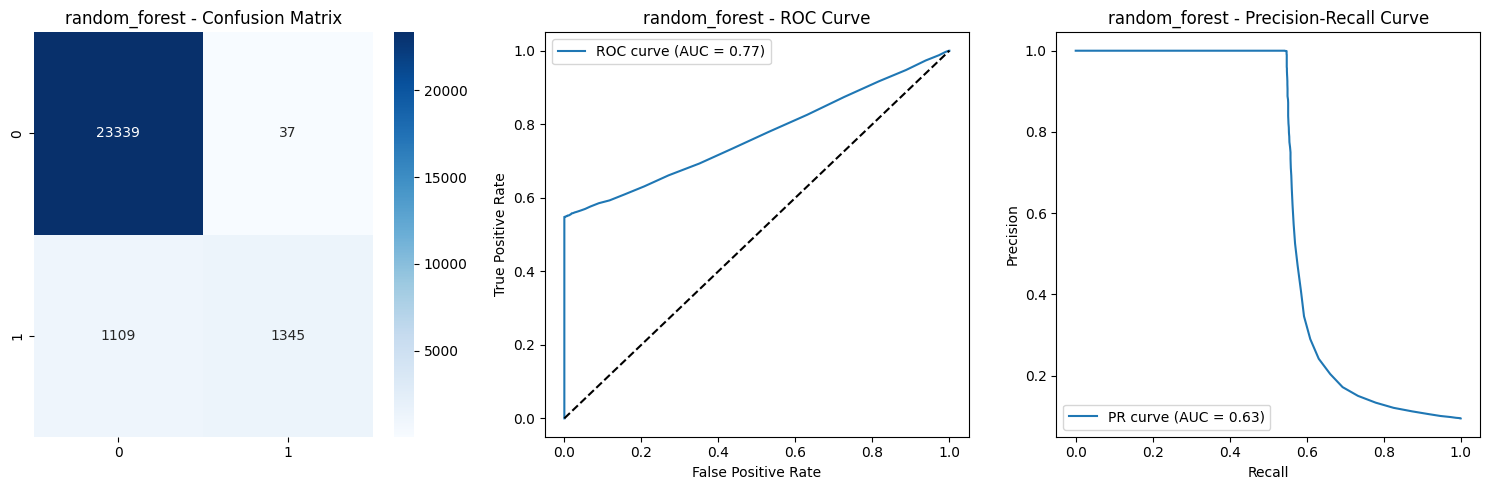

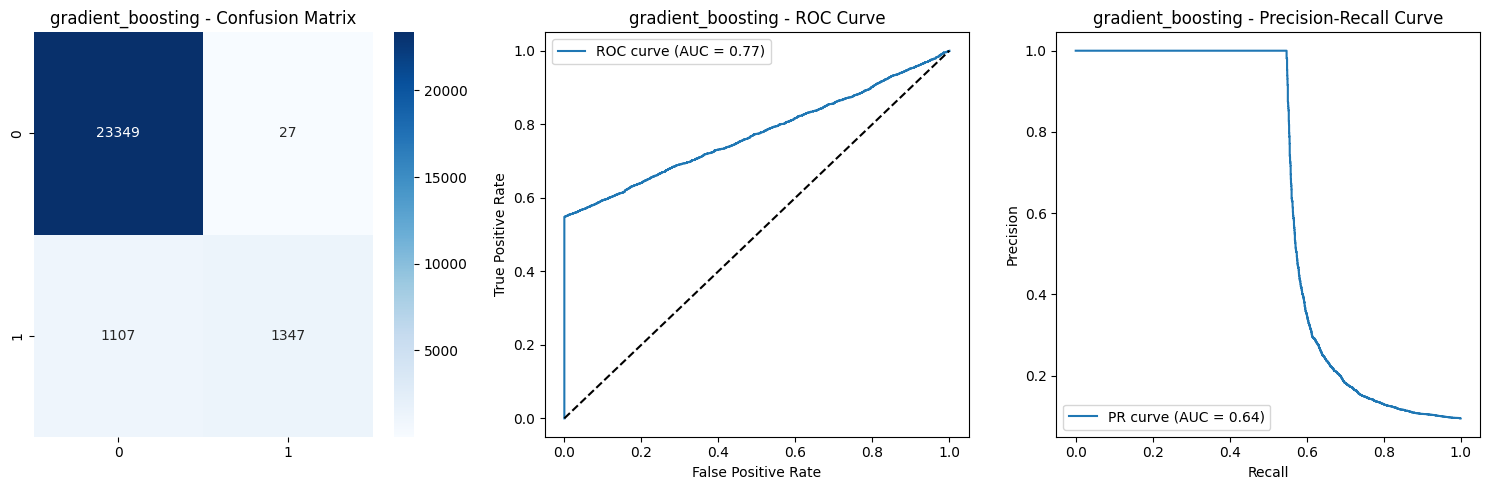

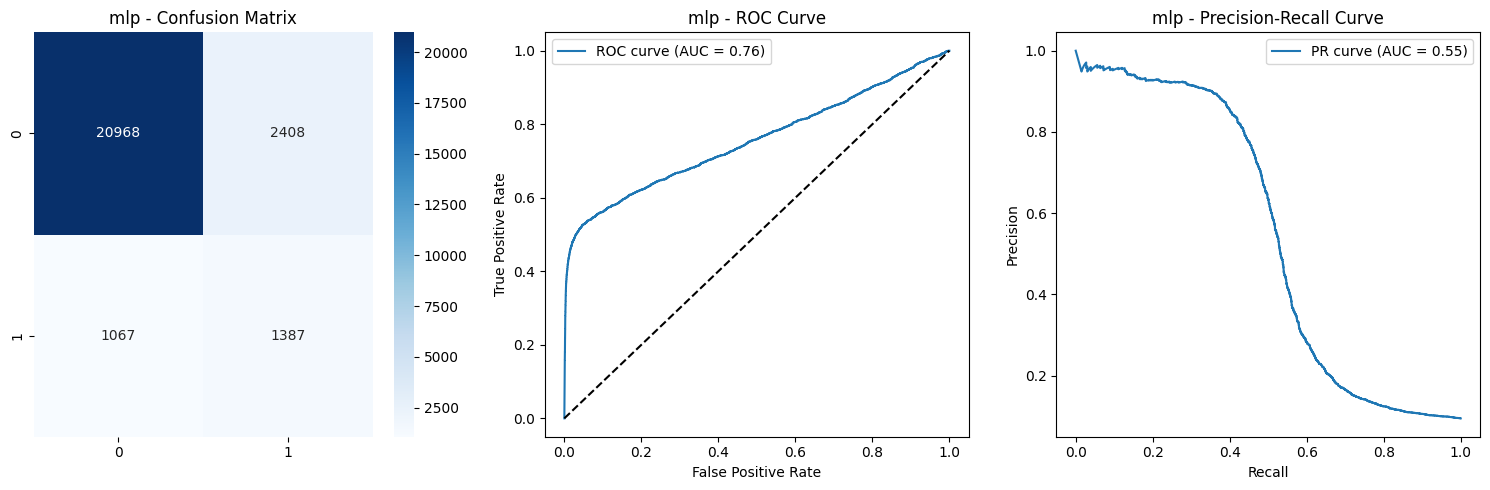


Credit Card Fraud Detection Results:


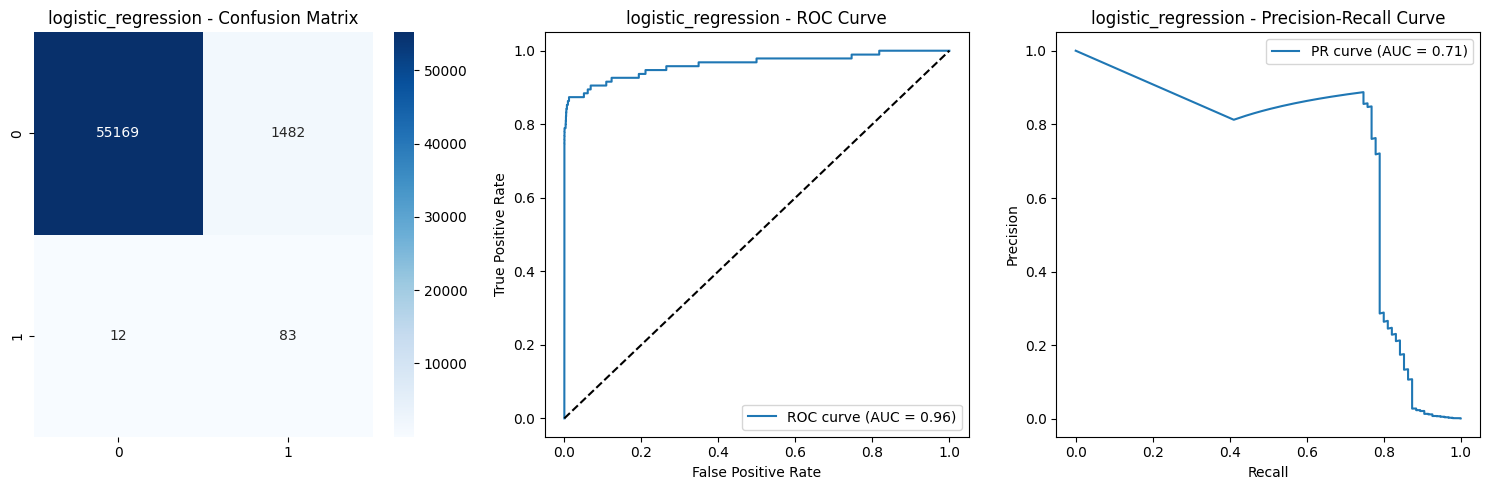

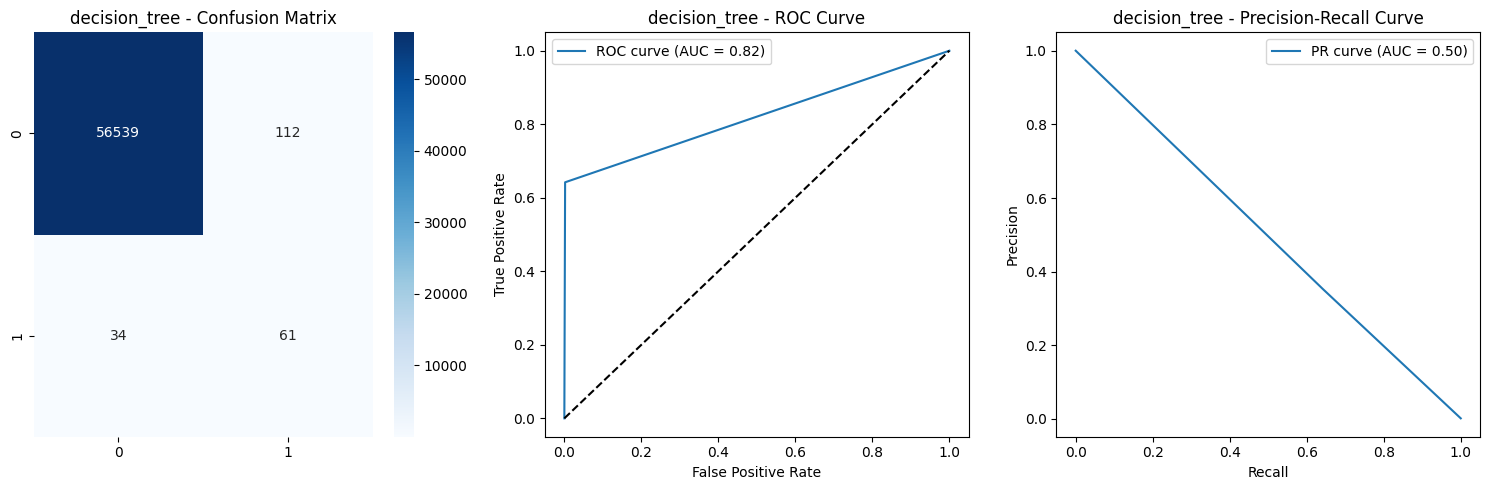

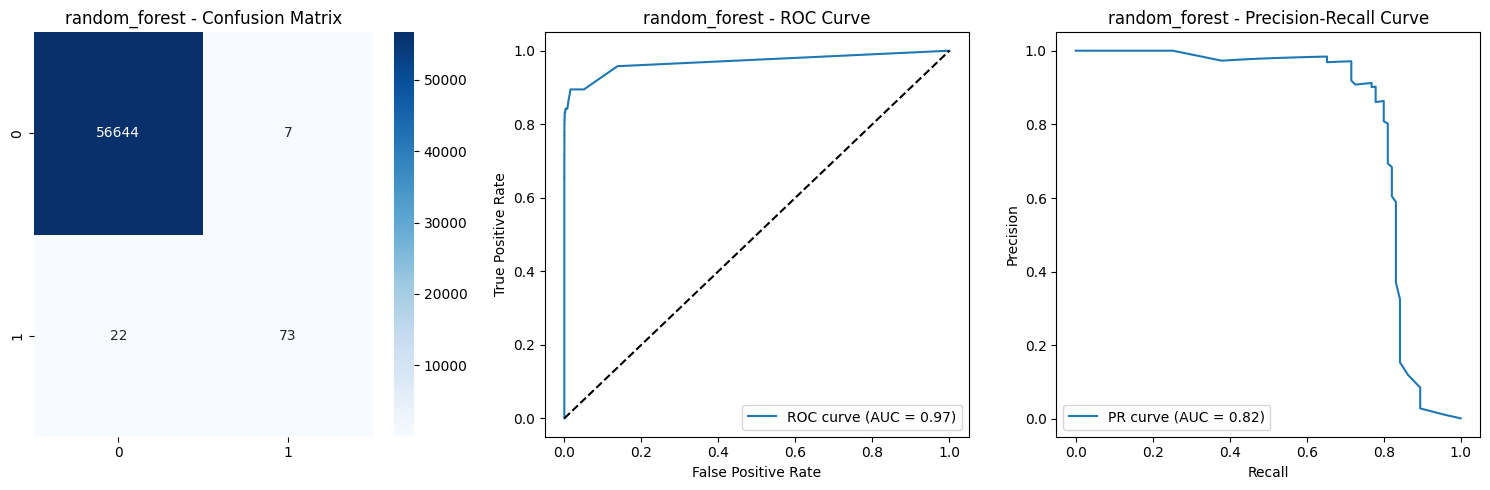

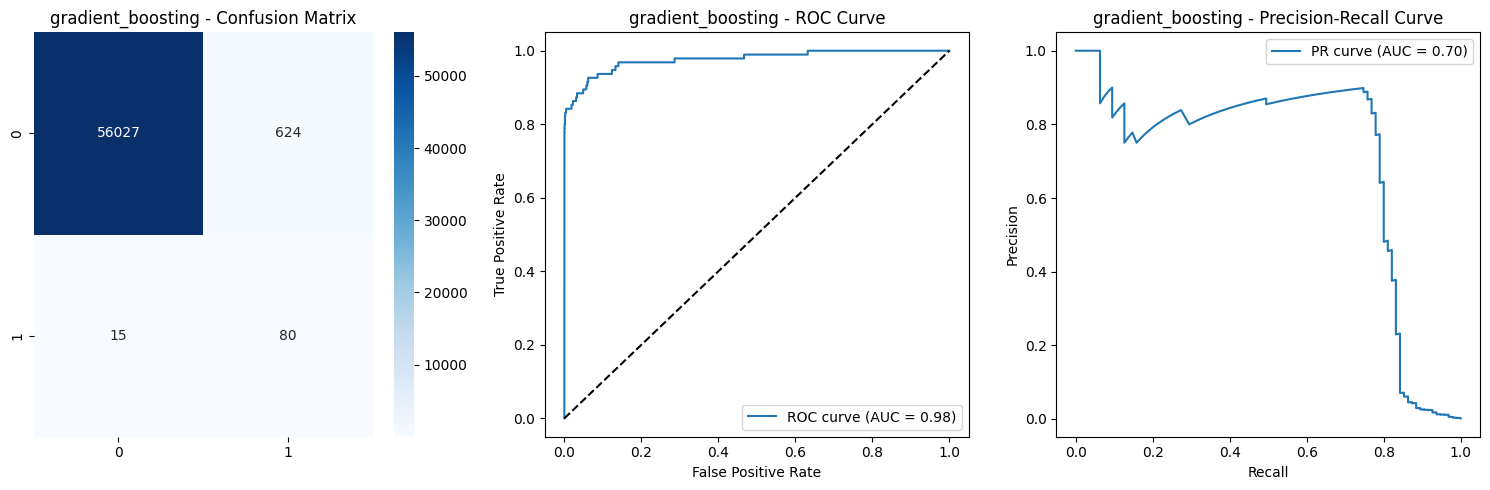

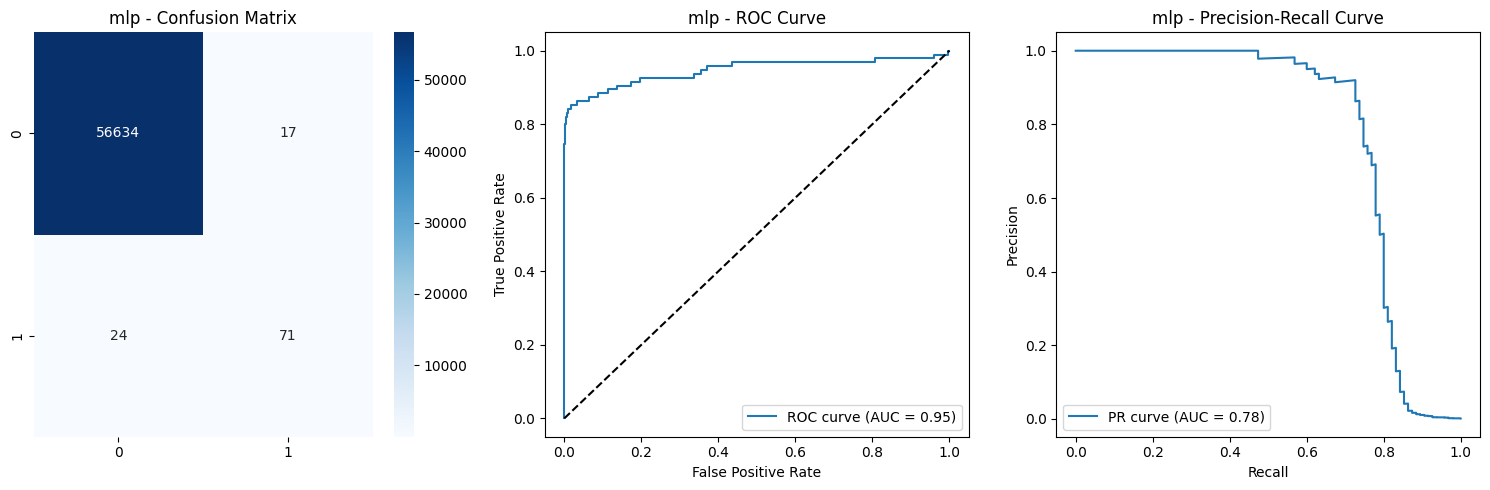

In [21]:
# Plot results for E-commerce fraud models
print("\nE-commerce Fraud Detection Results:")
fraud_detector_ecommerce.plot_results()

In [ ]:
# Plot results for credit card fraud models
print("\nCredit Card Fraud Detection Results:")
fraud_detector_credit.plot_results()

In [ ]:
# 9. Compare model performances
def print_model_comparison(detector, dataset_name):
    print(f"\nModel Performance Comparison for {dataset_name}:")
    print("-" * 80)
    print(f"{'Model':<20} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10} {'AUC-ROC':<10}")
    print("-" * 80)
    
    for model_name, results in detector.results.items():
        if 'classification_report' in results:
            metrics = results['classification_report']
            auc_roc = results['roc_curve'][2]
            print(f"{model_name:<20} "
                  f"{metrics['accuracy']:<10.3f} "
                  f"{metrics['weighted avg']['precision']:<10.3f} "
                  f"{metrics['weighted avg']['recall']:<10.3f} "
                  f"{metrics['weighted avg']['f1-score']:<10.3f} "
                  f"{auc_roc:<10.3f}")

print("\nComparing model performances...")
print_model_comparison(fraud_detector_ecommerce, "E-commerce Fraud Detection")
print_model_comparison(fraud_detector_credit, "Credit Card Fraud Detection")

In [ ]:
# 10. Save best models
print("\nSaving best models...")

def get_best_model(detector):
    best_f1 = 0
    best_model_name = None
    
    for model_name, results in detector.results.items():
        if 'classification_report' in results:
            f1 = results['classification_report']['weighted avg']['f1-score']
            if f1 > best_f1:
                best_f1 = f1
                best_model_name = model_name
    
    return best_model_name, detector.models[best_model_name]

In [ ]:
# Get and save best models
with mlflow.start_run(run_name="best_models"):
    # Save best e-commerce fraud model
    best_ecommerce_model_name, best_ecommerce_model = get_best_model(fraud_detector_ecommerce)
    mlflow.sklearn.log_model(best_ecommerce_model, "best_ecommerce_fraud_model")
    print(f"\nBest model for E-commerce Fraud Detection: {best_ecommerce_model_name}")
    
    # Save best credit card fraud model
    best_credit_model_name, best_credit_model = get_best_model(fraud_detector_credit)
    mlflow.sklearn.log_model(best_credit_model, "best_credit_fraud_model")
    print(f"Best model for Credit Card Fraud Detection: {best_credit_model_name}")

print("\nModel training and evaluation completed!")

In [ ]:
# 11. Generate summary visualizations
plt.figure(figsize=(15, 6))

# Plot ROC curves for all models (E-commerce)
plt.subplot(1, 2, 1)
for model_name, results in fraud_detector_ecommerce.results.items():
    if 'roc_curve' in results:
        fpr, tpr, auc_score = results['roc_curve']
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - E-commerce Fraud Detection')
plt.legend()

In [ ]:
# Plot ROC curves for all models (Credit Card)
plt.subplot(1, 2, 2)
for model_name, results in fraud_detector_credit.results.items():
    if 'roc_curve' in results:
        fpr, tpr, auc_score = results['roc_curve']
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Credit Card Fraud Detection')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Save the models and scalers for later use
import joblib

# Save the best models and their corresponding scalers
joblib.dump(best_ecommerce_model, 'best_ecommerce_fraud_model.joblib')
joblib.dump(best_credit_model, 'best_credit_fraud_model.joblib')
joblib.dump(fraud_detector_ecommerce.scaler, 'ecommerce_scaler.joblib')
joblib.dump(fraud_detector_credit.scaler, 'credit_scaler.joblib')

print("\nBest models and scalers have been saved to disk!")